Index(['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg',
       'DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS'],
      dtype='object')


C:\Users\ghadf\AppData\Local\Temp\ipykernel_4516\1618425153.py:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessor_data.corr()


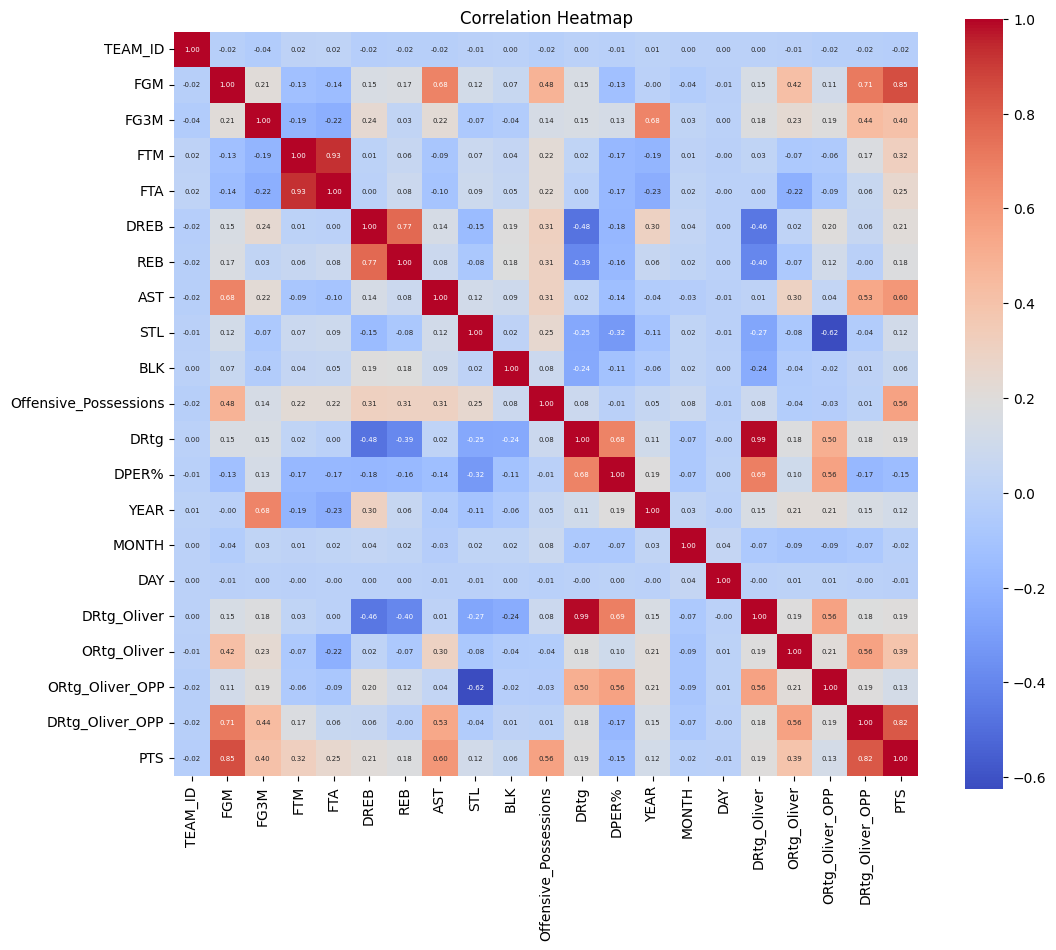

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the data (change to threepoint era data when model is ready)
data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\data\nba\model_preprocessing_store\nba_threeptera_prepreprocess_data.csv')


# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
preprocessor_data = data[[col for col in data.columns if col != 'PTS'] + ['PTS']]

#drop the columns that are not needed
x_excluded_independent_variables = [ 'TEAM_ABBREVIATION', 'WL', 'FGA', 'TOV', 'TEAM_NAME', 'GAME_ID', 'PPM', 'RPM', 'APM', 'SPM', 'BPM', 'TPM',   
                                    'FG_PCT', 'FG3_PCT', 'FT_PCT', 'TS%', 'ORtg', 'PER%', 'PTS_PER_MIN', 'eFG%', 'AST%', 'PTS_PER_MIN_DIFF', 'PTS_DIFF',
                                    'PER', 'OPM', 'DPM', 'USG%', 'FG3A', 'OREB', 'PF', 'MIN', 'SEASON_ID', 'MATCHUP', 'GAME_DATE', #, 
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP'
                                    , 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'SEASON_ID_OPP', 'Home_Away_OPP',  'Defensive_Possessions', #
                                     'TEAM_NAME_OPP', 'WL_OPP', 'MIN_OPP', 'PF_OPP', 'DREB_OPP','PTS_PER_MIN_OPP', 'TEAM_ID_OPP', 'WL_encoded_OPP',
                                      'ORtg_Oliver_DIFF', 'DRtg_Oliver_DIFF', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
                                    'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF', 
                                    'WL_encoded', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 'FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP'
                                     ] #, 'PLUS_MINUS_OPP', 'PLUS_MINUS', 'PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 
                                    #'AST', 'PF', 'STL', 'BLK', 'DREB', 'Offensive_Possessions',
                                     #'FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP',
                                     #  'Defensive_Possessions','ORtg_Oliver_OPP', 'DRtg_Oliver_OPP',
                                    #'DRtg', 'DPER%', 'ORtg_Oliver_OPP', 'ORtg_Oliver_DIFF', 'ORtg_Oliver', 'DRtg_Oliver', 'DRtg_Oliver_OPP'

#drop the columns that are not needed

#preprocessor_data = preprocessor_data.drop(x_excluded_independent_variables, axis=1)
#print(preprocessor_data.columns)

#only include ['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL','BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg','DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver','ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS']
preprocessor_data = preprocessor_data[['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL','BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg','DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver','ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS']]
print(preprocessor_data.columns)
# Create a correlation matrix for the selected columns
correlation_matrix = preprocessor_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

Data reasoning:
ORtg_Oliver and DRtg_Oliver_OPP(1st in corr) are most correlated of ratings to PTS. Your offense is important but the other teams defense is twice as important, in other words: Your defense won't win you as many championships as it will LOSE you championships if you have a bad one

* Offensive Possessions: Just as important as any statistic for PTS, ensure you have your rebounding down to keep up with the other team in chances
* AST is 2nd most for PTS in correlation, ensure you have a team rather than an individual because that will score you more points everytime.

Including FGM, FG3M, FTM. I'm using averages (team avgs per matchup and home/away) to predict the future games rather than actual statistics so there isn't any data leakage. In training there is dropouts to generalize the logic.

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the columns for the dependent (y) and independent (X) variables
y_column = 'PTS'
columns_to_drop = [y_column]


# Define feature lists
categorical_features = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID'] #, 'TEAM_ID_OPP'
numerical_features = [col for col in preprocessor_data.columns if col not in categorical_features + columns_to_drop]

# Transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

one_hot_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('one_hot', one_hot_transformer, categorical_features)
])

# Apply the preprocessor to the data
X = preprocessor_data.drop(columns=columns_to_drop, axis=1)
y = preprocessor_data[y_column]

# Scale the target variable for neural networks to be between 0 and 1
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()


# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the data using the already fitted preprocessor
X_preprocessed = preprocessor.transform(X)

print('Before preprocessing = ', X.shape)
print('After preprocessing = ', X_preprocessed.shape)
print('y shape = ', y.shape)

# Checking if there are any null values after preprocessing
print(pd.DataFrame(X_preprocessed).isnull().sum())


Before preprocessing =  (94886, 22)
After preprocessing =  (94886, 765)
y shape =  (94886,)
0    0
dtype: int64


In [3]:

# Split the data for traditional models
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(X_train)

# Split the data for neural networks
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_preprocessed, y_scaled, test_size=0.2, random_state=42)
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_nn.toarray()).float()
y_train_tensor = torch.tensor(y_train_nn).float().unsqueeze(1)
X_test_tensor = torch.tensor(X_test_nn.toarray()).float()
y_test_tensor = torch.tensor(y_test_nn).float().unsqueeze(1)


  (0, 0)	-1.075973252373713
  (0, 1)	-0.8265981327219094
  (0, 2)	-0.4594827674666894
  (0, 3)	-0.6343074218244079
  (0, 4)	1.4422653500421088
  (0, 5)	0.7899959831249216
  (0, 6)	-0.31801606311276337
  (0, 7)	-0.6164800910838657
  (0, 8)	-0.7510913869996776
  (0, 9)	0.7964889088718764
  (0, 10)	-0.3669099891455417
  (0, 11)	0.7244849760292847
  (0, 12)	1.3568270772956479
  (0, 13)	1.453320998458838
  (0, 14)	1.7839633724452826
  (0, 15)	-0.3240629975378577
  (0, 16)	-0.10729176849778493
  (0, 17)	-0.6026801932702506
  (0, 18)	-1.979758696406
  (0, 34)	1.0
  (0, 49)	1.0
  (0, 669)	1.0
  (1, 0)	1.7180442904823547
  (1, 1)	-1.057911530705987
  (1, 2)	0.15226690979387122
  :	:
  (75906, 19)	1.0
  (75906, 49)	1.0
  (75906, 86)	1.0
  (75907, 0)	0.8449138083398335
  (75907, 1)	2.643102837039254
  (75907, 2)	-0.4594827674666894
  (75907, 3)	-0.5108380086426535
  (75907, 4)	0.9080216801036506
  (75907, 5)	1.2350394360008083
  (75907, 6)	1.5162131824448666
  (75907, 7)	-1.603215674135124
  (759

In [4]:
# Hyperparameter tuning
num_epochs = 10
learning_rate = 0.001
dropout_rate = 0.5
batch_size = 64
HIDDEN_SIZE = 512
input_dim = X_train_tensor.shape[1]

In [5]:
# Neural network architecture
class NBA_Score_Predictor(nn.Module):
    def __init__(self, input_dim, hidden_size=HIDDEN_SIZE, dropout_rate=dropout_rate):
        super(NBA_Score_Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)  # Example of using HIDDEN_SIZE to define next layer
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size // 2, 1)  # No activation function here if we're not using MinMax scaling

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)  # Remove the sigmoid if you're going to inverse transform the output
        return x


# Initialize the model
model = NBA_Score_Predictor(input_dim)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Use the learning_rate variable

# DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)  # Use the batch_size variable


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Training loop

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)

    # Calculate the loss
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Calculate evaluation metrics
    predictions_np = predictions.cpu().detach().numpy()  # Convert to numpy array
    y_test_np = y_test_tensor.cpu().detach().numpy()     # Convert to numpy array

    mae = mean_absolute_error(y_test_np, predictions_np)
    mse = mean_squared_error(y_test_np, predictions_np)
    rmse = mean_squared_error(y_test_np, predictions_np, squared=False)

    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Epoch [1/10], Loss: 0.0007
Epoch [2/10], Loss: 0.0002
Epoch [3/10], Loss: 0.0003
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0006
Epoch [6/10], Loss: 0.0004
Epoch [7/10], Loss: 0.0002
Epoch [8/10], Loss: 0.0005
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0004
Test Loss: 0.0001
Mean Absolute Error (MAE): 0.0053
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0072


In [7]:
from sklearn.metrics import r2_score, explained_variance_score

# Calculate R-squared and Explained Variance Score = This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In other words, it measures how well the regression predictions approximate the real data points. An R-squared of 1 indicates that the regression predictions perfectly fit the data.
r2 = r2_score(y_test_np, predictions_np)
#explained_variance = This metric measures the proportion to which a mathematical model accounts for the variation
#  (dispersion) of a given data set. An explained variance score of 1 indicates perfect prediction.
explained_variance = explained_variance_score(y_test_np, predictions_np)

print(f'R-squared: {r2:.4f}')
print(f'Explained Variance Score: {explained_variance:.4f}')

from sklearn.metrics import mean_squared_log_error

#print(y_test_np)
print(predictions_np)
# Calculate Mean Squared Log Error = This is particularly useful if you want to penalize underestimates more than overestimates.
#  It's useful when you care about percentage errors rather than absolute value errors.
msle = mean_squared_log_error(y_test_np, predictions_np)

print(f'Mean Squared Log Error (MSLE): {msle:.4f}')


R-squared: 0.9954
Explained Variance Score: 0.9954
[[0.5327737 ]
 [0.41537353]
 [0.39125288]
 ...
 [0.4667242 ]
 [0.292148  ]
 [0.4425268 ]]
Mean Squared Log Error (MSLE): 0.0000


In [8]:
from joblib import dump, load

#Save Model and preprocessor
# Define the paths
data_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_season_games_clean.csv'
team_ids_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv'
pipeline_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\linreg_team_preprocessor.joblib'
model_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\linearregression\linreg_team_model.pth'
scaler_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\linreg_team_scalar.joblib'
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\linreg_team_point_pred.csv'

# Save the preprocessor
dump(preprocessor, pipeline_save_path)
#save linreg team scalar
dump(scaler_y, scaler_save_path)

# Save the LSTM model
torch.save(model.state_dict(), model_save_path)

# Load the Preprocessor and Model
loaded_pipeline = load(pipeline_save_path)
scalar_y = load(scaler_save_path)

model = NBA_Score_Predictor(input_dim)
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set the model to evaluation mode

NBA_Score_Predictor(
  (fc1): Linear(in_features=765, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

In [9]:
# Load the data
prediction_data = pd.read_csv(data_path)
print(prediction_data.columns)
included_columns = ['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL','BLK', 'Home_Away', 'MATCHUP_ID',
                     'Offensive_Possessions', 'DRtg','DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
                     'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP']#, 'PTS'
prediction_data = prediction_data[included_columns]
print(prediction_data.head())

Index(['Home_Away', 'WL_encoded', 'TEAM_ID', 'TEAM_ID_OPP', 'YEAR', 'MONTH',
       'DAY', 'MATCHUP_ID', 'Date', 'PTS', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM',
       'FTA', 'AST', 'OREB', 'TOV', 'STL', 'BLK', 'REB', 'MIN', 'DREB',
       'ORtg_Oliver', 'DRtg_Oliver', 'PTS_OPP', 'FGM_OPP', 'FGA_OPP',
       'FG3M_OPP', 'FG3A_OPP', 'FTM_OPP', 'FTA_OPP', 'AST_OPP', 'OREB_OPP',
       'DREB_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'REB_OPP', 'MIN_OPP',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS_PER_MIN', 'FG_PCT',
       'FG3_PCT', 'FT_PCT', 'TS%', 'eFG%', 'AST%', 'Offensive_Possessions',
       'ORtg', 'PER%', 'OFF_EFF', 'PTS_PER_MIN_OPP', 'FG_PCT_OPP',
       'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP',
       'Defensive_Possessions', 'DRtg', 'DPER%', 'PTS_DIFF',
       'PTS_PER_MIN_DIFF', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
       'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF',
       'ORtg_Oliver_DIFF', 'DRtg_Oliver_DIFF'],
      dtype='o

In [10]:
# Preprocess the unseen data
X_unseen_preprocessed = loaded_pipeline.transform(prediction_data)
X_unseen_preprocessed = X_unseen_preprocessed.toarray()
X_unseen_tensor = torch.tensor(X_unseen_preprocessed).float()

# Load the model
model = NBA_Score_Predictor(X_unseen_tensor.shape[1])
model.load_state_dict(torch.load(model_save_path))
model.eval()

# Make predictions using the loaded model
with torch.no_grad():
    unseen_predictions = model(X_unseen_tensor)
    unseen_predictions_np = unseen_predictions.numpy().flatten()

In [11]:

# Inverse transform the predictions
unscaled_predictions = scaler_y.inverse_transform(unseen_predictions_np.reshape(-1, 1)).flatten()


# Convert the unscaled predictions to a DataFrame and concatenate with the original data
unscaled_predictions_df = pd.DataFrame(unscaled_predictions, columns=['PTS'])
prediction_data_with_unscaled_predictions = pd.concat(
    [prediction_data.reset_index(drop=True), unscaled_predictions_df], 
    axis=1
)

# Convert the 'YEAR', 'MONTH', 'DAY' columns to a datetime object
prediction_data_with_unscaled_predictions['Date'] = pd.to_datetime(
    prediction_data_with_unscaled_predictions[['YEAR', 'MONTH', 'DAY']]
)

# Merge with unique teams data
unique_teams = pd.read_csv(team_ids_path)[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_unscaled_predictions.merge(unique_teams, on='TEAM_ID', how='left')

# Filter for the games of interest, for example, today's games
today = pd.Timestamp.today().normalize()
prediction_data_today = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Save the predictions to a CSV file
#prediction_data_today.to_csv(saved_predictions_path, index=False)

# Display the predictions
print(prediction_data_today)

       TEAM_ID   FGM  FG3M   FTM   FTA  DREB   REB   AST   STL  BLK  ...  \
0   1610612759  51.0  14.0  10.0  16.0  31.0  41.0  26.0   9.0  5.0  ...   
1   1610612744  43.5  16.5  16.0  20.0  39.0  52.5  30.5  10.0  5.5  ...   
2   1610612757  35.0  13.0  13.0  13.0  21.0  32.0  28.0   9.0  4.0  ...   
3   1610612739  41.0  12.0  20.0  23.0  28.0  39.0  22.0   4.0  4.0  ...   
4   1610612766  40.0   9.0  12.0  19.0  37.0  44.5  21.0   3.0  3.0  ...   
5   1610612754  39.0  18.0  15.0  21.0  30.0  37.0  25.0   4.0  5.5  ...   
6   1610612765  37.0   7.0  31.0  41.0  31.0  43.0  22.0   6.0  6.0  ...   
7   1610612751  42.5  12.0  15.0  19.0  39.0  45.5  27.0   4.0  8.5  ...   
8   1610612748  39.0   9.5  24.5  26.5  29.0  43.0  22.0   7.0  3.0  ...   
9   1610612752  42.0  10.0  27.0  29.0  31.0  47.0  23.0   7.0  3.0  ...   
10  1610612749  40.5  13.5  18.0  25.0  41.0  56.5  21.0   5.5  6.5  ...   
11  1610612762  40.0  12.5  18.0  22.5  29.0  44.5  22.5   1.5  6.0  ...   
12  16106127

In [12]:
# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(unseen_predictions_np, columns=['PTS'])
#make date out of 'YEAR', 'MONTH', 'DAY'
prediction_data['Date'] = pd.to_datetime(prediction_data[['YEAR', 'MONTH', 'DAY']])

# Concatenate the predictions to the original data
prediction_data_with_predictions = pd.concat([prediction_data.reset_index(drop=True), predictions_df], axis=1)

prediction_data_with_predictions['Date'] = pd.to_datetime(prediction_data_with_predictions[['YEAR', 'MONTH', 'DAY']])


# Merge with unique teams data
df1 = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv')
unique_teams = df1[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_unscaled_predictions.merge(unique_teams, on='TEAM_ID', how='left')
print(prediction_data_with_results.columns)

# Filter for the games of interest, if necessary
# For example, if you want to filter for today's games:
today = pd.Timestamp.today().normalize()
prediction_data_today = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Display the predictions
print(prediction_data_today[['TEAM_NAME', 'PTS']])


Index(['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg',
       'DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION'],
      dtype='object')
                 TEAM_NAME         PTS
0        San Antonio Spurs  126.856934
1    Golden State Warriors  120.454079
2   Portland Trail Blazers   97.197647
3      Cleveland Cavaliers  115.546196
4        Charlotte Hornets  101.994896
5           Indiana Pacers  110.991646
6          Detroit Pistons  112.283157
7            Brooklyn Nets  112.073639
8               Miami Heat  111.443932
9          New York Knicks  120.843071
10         Milwaukee Bucks  113.197235
11               Utah Jazz  109.953728
12      Los Angeles Lakers  124.694794
13           Atlanta Hawks  118.923729
14           Chicago Bulls  108.255547
15  Minnesota Timberwolves  125.

In [13]:
#Checks for the range of the predictions to ensure that they are within the range of the original data
# Use inverse_transform to get the unscaled predictions
unscaled_predictions = scaler_y.inverse_transform(predictions_np.reshape(-1, 1)).flatten()

# Check the range of the unscaled predictions
print(f"Original y_train min: {y_train.min()}, max: {y_train.max()}")
print(f"Original y_test min: {y_test.min()}, max: {y_test.max()}")
print(f"Unscaled training predictions min: {unscaled_predictions.min()}, max: {unscaled_predictions.max()}")

# Use inverse_transform to get the unscaled predictions
unscaled_predictions = scaler_y.inverse_transform(unseen_predictions_np.reshape(-1, 1)).flatten()
print(f"Unscaled unseen predictions min: {unscaled_predictions.min()}, max: {unscaled_predictions.max()}")

Original y_train min: 54, max: 176
Original y_test min: 49, max: 175
Unscaled training predictions min: 50.50825119018555, max: 172.59869384765625
Unscaled unseen predictions min: 97.19764709472656, max: 126.85693359375


In [14]:
#sort by the matchup id and display the predictions, team name, and matchup id
prediction_data_today = prediction_data_today.sort_values(by=['MATCHUP_ID'])
print(prediction_data_today[['TEAM_NAME', 'PTS', 'MATCHUP_ID', 'Home_Away', 'TEAM_ID']])

                 TEAM_NAME         PTS MATCHUP_ID Home_Away     TEAM_ID
0        San Antonio Spurs  126.856934     ATLSAS      Home  1610612759
13           Atlanta Hawks  118.923729     ATLSAS      Away  1610612737
4        Charlotte Hornets  101.994896     BKNCHA      Away  1610612766
7            Brooklyn Nets  112.073639     BKNCHA      Home  1610612751
14           Chicago Bulls  108.255547     CHIMIL      Home  1610612741
10         Milwaukee Bucks  113.197235     CHIMIL      Away  1610612749
2   Portland Trail Blazers   97.197647     CLEPOR      Away  1610612757
3      Cleveland Cavaliers  115.546196     CLEPOR      Home  1610612739
6          Detroit Pistons  112.283157     DETNYK      Away  1610612765
9          New York Knicks  120.843071     DETNYK      Home  1610612752
1    Golden State Warriors  120.454079     GSWLAC      Home  1610612744
16             LA Clippers   99.879654     GSWLAC      Away  1610612746
8               Miami Heat  111.443932     INDMIA      Home  161

In [15]:
#split up dataset into two dataframes, one for home teams and one for away teams and then remerge them by matchup_id
home_teams = prediction_data_today[prediction_data_today['Home_Away'] == 'Home']
away_teams = prediction_data_today[prediction_data_today['Home_Away'] == 'Away']
print(home_teams.columns)

#merge the two dataframes by matchup_id, adding a suffix to the column names to differentiate between the two
home_away_teams = pd.merge(home_teams[['TEAM_NAME', 'TEAM_ID', 'PTS', 'MATCHUP_ID', 'Date']], away_teams[['TEAM_NAME', 'TEAM_ID', 'PTS', 'MATCHUP_ID', 'Date']], on=['MATCHUP_ID', 'Date'] , how='left', suffixes=('_HOME', '_AWAY'))

#add win/loss column for home and away team
home_away_teams['HOME_WIN'] = np.where(home_away_teams['PTS_HOME'] > home_away_teams['PTS_AWAY'], 0, 1)
home_away_teams['AWAY_WIN'] = np.where(home_away_teams['PTS_AWAY'] > home_away_teams['PTS_HOME'], 0, 1)
print(home_away_teams) #0 is a win, 1 is a loss

Index(['TEAM_ID', 'FGM', 'FG3M', 'FTM', 'FTA', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'Home_Away', 'MATCHUP_ID', 'Offensive_Possessions', 'DRtg',
       'DPER%', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver', 'ORtg_Oliver',
       'ORtg_Oliver_OPP', 'DRtg_Oliver_OPP', 'PTS', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION'],
      dtype='object')
           TEAM_NAME_HOME  TEAM_ID_HOME    PTS_HOME MATCHUP_ID       Date  \
0       San Antonio Spurs    1610612759  126.856934     ATLSAS 2023-11-30   
1           Brooklyn Nets    1610612751  112.073639     BKNCHA 2023-11-30   
2           Chicago Bulls    1610612741  108.255547     CHIMIL 2023-11-30   
3     Cleveland Cavaliers    1610612739  115.546196     CLEPOR 2023-11-30   
4         New York Knicks    1610612752  120.843071     DETNYK 2023-11-30   
5   Golden State Warriors    1610612744  120.454079     GSWLAC 2023-11-30   
6              Miami Heat    1610612748  111.443932     INDMIA 2023-11-30   
7   Oklahoma City Thunder    1610612760 

In [16]:
from datetime import datetime
import pandas as pd
import os

# 1. Create a DataFrame for today's outcomes based on prediction_data
today_predictions = home_away_teams.copy()

# 2. Add today's date and recording timestamp
today_predictions['date_prediction_recorded'] = pd.Timestamp.today()

#filter for ATLCHA matchup_id
#today_predictions = today_predictions[today_predictions['MATCHUP_ID'] == 'ATLCHA']

# Define the path to the saved predictions
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\linreg_team_point_pred.csv'

# 3. Check if the saved predictions file exists
if not os.path.exists(saved_predictions_path):
    # If it doesn't exist, create it from today's predictions
    today_predictions.to_csv(saved_predictions_path, index=False)
    print(today_predictions.shape)
else:
    # If it exists, load it and update
    saved_predictions = pd.read_csv(saved_predictions_path)
    # Normalize the 'Date' column to remove time portion
    saved_predictions['Date'] = pd.to_datetime(saved_predictions['Date']).dt.normalize()

    print(saved_predictions.shape)

    print(today_predictions.shape)
    # 4. Concatenate existing and new predictions
    all_predictions = pd.concat([saved_predictions, today_predictions], ignore_index=True)
    
    # 5. Sort by date recorded, matchup id, and home_away
    all_predictions.sort_values(by=['date_prediction_recorded', 'MATCHUP_ID', 'TEAM_NAME_HOME'], ascending=[True, True, True], inplace=True)
    
    all_predictions['Date'] = pd.to_datetime(all_predictions['Date']).dt.normalize()
    
    # 6. Remove duplicates, keeping only the newest entry and not deleting previous days predictions
    all_predictions.drop_duplicates(subset=['MATCHUP_ID', 'TEAM_ID_HOME', 'Date'], keep='first', inplace=True)

    # Sort by date and reset index
    all_predictions = all_predictions.sort_values(by=['Date']).reset_index(drop=True)
    
    # 7. Save the updated DataFrame back to CSV
    all_predictions.to_csv(saved_predictions_path, index=False)

# 8. Display the results
all_predictions.sort_values(by=['Date'], ascending=[True], inplace=True)
print(all_predictions)
print(all_predictions.shape)

(135, 11)
(9, 11)
            TEAM_NAME_HOME  TEAM_ID_HOME    PTS_HOME MATCHUP_ID       Date  \
0       Washington Wizards    1610612764  106.569557     CHAWAS 2023-11-10   
7           Boston Celtics    1610612738  118.686485     BKNBOS 2023-11-10   
6          Detroit Pistons    1610612765  109.081917     DETPHI 2023-11-10   
5          Houston Rockets    1610612745  108.890640     HOUNOP 2023-11-10   
8         Dallas Mavericks    1610612742   99.440002     DALLAC 2023-11-10   
..                     ...           ...         ...        ...        ...   
138  Golden State Warriors    1610612744  120.454079     GSWLAC 2023-11-30   
139        New York Knicks    1610612752  120.843071     DETNYK 2023-11-30   
140    Cleveland Cavaliers    1610612739  115.546196     CLEPOR 2023-11-30   
141          Chicago Bulls    1610612741  108.255547     CHIMIL 2023-11-30   
143      San Antonio Spurs    1610612759  126.856934     ATLSAS 2023-11-30   

             TEAM_NAME_AWAY  TEAM_ID_AWAY    

In [17]:
past_results_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_current_season_prediction_tracker.csv'

# Load the past results
past_results = pd.read_csv(past_results_path)
#print(past_results.head())

past_results = past_results[['GAME_DATE', 'TEAM_ID', 'TEAM_NAME', 'MATCHUP_ID', 'WL_encoded', 'PTS']]

past_results = past_results.rename(columns={'GAME_DATE': 'Date'})


#filter for date 2023-11-16
#past_results = past_results[past_results['Date'] == '2023-11-17']
#all_predictions = all_predictions[all_predictions['Date'] == '2023-11-17']

#past_results = past_results.sort_values(by=['Date'], ascending=[False]) #, inplace=True

#filter Date for only 11-10-2023
#past_results = past_results[past_results['Date'] == '2023-11-10']
#print(past_results.shape)
#past_results = past_results[past_results['TEAM_NAME'] == 'Los Angeles Lakers']
#print(past_results.head())
#print(past_results.shape)
#and for matchup LALPHX         

# Check data types
#change date to object
all_predictions['Date'] = all_predictions['Date'].astype(str)
#all_predictions = all_predictions[all_predictions['Date'] == '2023-11-10']


#print(past_results[['Date', 'TEAM_ID', 'MATCHUP_ID']].dtypes)
#print(all_predictions[['Date', 'TEAM_ID_HOME', 'MATCHUP_ID']].dtypes)

#put the home and away teams concatenated together into one dataframe to compare to past results
home_teams = all_predictions[['TEAM_NAME_HOME', 'TEAM_ID_HOME', 'PTS_HOME','HOME_WIN', 'MATCHUP_ID', 'Date']]
away_teams = all_predictions[['TEAM_NAME_AWAY', 'TEAM_ID_AWAY', 'PTS_AWAY','AWAY_WIN', 'MATCHUP_ID', 'Date']]

#change team_name_home to team_name
home_teams = home_teams.rename(columns={'TEAM_NAME_HOME': 'TEAM_NAME', 'TEAM_ID_HOME': 'TEAM_ID' , 'PTS_HOME': 'PTS', 'HOME_WIN': 'WL_encoded'})

#change team_name_home to team_name
away_teams = away_teams.rename(columns={'TEAM_NAME_AWAY': 'TEAM_NAME', 'TEAM_ID_AWAY': 'TEAM_ID', 'PTS_AWAY': 'PTS', 'AWAY_WIN': 'WL_encoded'})

#concatenate the two dataframes
all_data = pd.concat([home_teams, away_teams], ignore_index=True)

#all_data = all_data[all_data['MATCHUP_ID'] == 'LALPHX']
print(all_data)
print(all_data.shape)

#print(past_results)
print(past_results.shape)

past_data_with_predictions = pd.merge(past_results, all_data, on=['Date', 'TEAM_ID', 'MATCHUP_ID'], #, 'TEAM_NAME'
                                      how='inner', suffixes=('', '_predictions')) #, validate='one_to_one'
#print(past_data_with_predictions.shape)
#rename WL_encoded_predictions to linreg_nn_predictions
past_data_with_predictions = past_data_with_predictions.rename(columns={'WL_encoded_predictions': 'linreg_nn_predictions'})
print(past_data_with_predictions.shape)
#print(past_data_with_predictions)

                  TEAM_NAME     TEAM_ID         PTS  WL_encoded MATCHUP_ID  \
0        Washington Wizards  1610612764  106.569557           0     CHAWAS   
1            Boston Celtics  1610612738  118.686485           0     BKNBOS   
2           Detroit Pistons  1610612765  109.081917           1     DETPHI   
3           Houston Rockets  1610612745  108.890640           1     HOUNOP   
4          Dallas Mavericks  1610612742   99.440002           1     DALLAC   
..                      ...         ...         ...         ...        ...   
283             LA Clippers  1610612746   99.879654           1     GSWLAC   
284         Detroit Pistons  1610612765  112.283157           1     DETNYK   
285  Portland Trail Blazers  1610612757   97.197647           1     CLEPOR   
286         Milwaukee Bucks  1610612749  113.197235           0     CHIMIL   
287           Atlanta Hawks  1610612737  118.923729           1     ATLSAS   

           Date  
0    2023-11-10  
1    2023-11-10  
2    2023

In [18]:
past_data_with_predictions.sort_values(by='Date', inplace=True)

#if right about WL_encoded to linreg_nn_predictions, then add 1 to correct column and 0 otherwise
past_data_with_predictions['Correct'] = np.where(past_data_with_predictions['WL_encoded'] == past_data_with_predictions['linreg_nn_predictions'], 1, 0)
#print(past_data_with_predictions[['Correct', 'MAE', 'MATCHUP_ID']])

# First, calculate the point differences
past_data_with_predictions['Point_Diff'] = abs(past_data_with_predictions['PTS'] - past_data_with_predictions['PTS_predictions'])

# Now calculate the cumulative MAE
# We create a new column 'Cumulative_MAE' which computes the cumulative mean of 'Point_Diff'
past_data_with_predictions['Cumulative_MAE'] = past_data_with_predictions['Point_Diff'].expanding().mean()

# Next, we calculate the correct percentage
# We have the 'Correct' column already. We'll calculate the cumulative sum of this column
past_data_with_predictions['Cumulative_Correct'] = past_data_with_predictions['Correct'].expanding().sum()

# We'll also need the cumulative count of games predicted
past_data_with_predictions['Games_Predicted'] = past_data_with_predictions['Correct'].expanding().count()

# Now we can calculate the cumulative correct percentage
past_data_with_predictions['Cumulative_Correct_Percentage'] = past_data_with_predictions['Cumulative_Correct'] / past_data_with_predictions['Games_Predicted']

# Now you can save this DataFrame to a CSV file or inspect it
print(past_data_with_predictions[['Date', 'MATCHUP_ID', 'Correct', 'PTS', 'PTS_predictions', 'Cumulative_MAE', 'Cumulative_Correct_Percentage']])

# Optionally, save to CSV
# past_data_with_predictions.to_csv('updated_predictions_tracker.csv', index=False)


           Date MATCHUP_ID  Correct  PTS  PTS_predictions  Cumulative_MAE  \
26   2023-11-10     HOUNOP        0  104       108.890640        4.890640   
86   2023-11-10     CHAWAS        0  117       106.569557        7.660542   
75   2023-11-10     OKCSAC        1   98       110.570839        9.297307   
45   2023-11-10     MINSAS        1  117       121.561661        8.113396   
58   2023-11-10     DETPHI        1  114       119.216736        7.534064   
..          ...        ...      ...  ...              ...             ...   
143  2023-11-29     NOPPHI        1  114       116.597954       11.085255   
275  2023-11-29     ORLWAS        0  120       116.099846       11.062445   
274  2023-11-29     ORLWAS        0  139       110.726601       11.116910   
216  2023-11-29     LACSAC        0  131       125.947777       11.097779   
217  2023-11-29     LACSAC        0  117       128.555145       11.099217   

     Cumulative_Correct_Percentage  
26                        0.000000  
8

In [19]:
print(past_data_with_predictions[['Date', 'MATCHUP_ID', 'Correct', 'Cumulative_MAE', 'Cumulative_Correct_Percentage']].tail(15))


           Date MATCHUP_ID  Correct  Cumulative_MAE  \
110  2023-11-28     BOSCHI        1       11.118177   
313  2023-11-29     MEMUTA        1       11.130402   
312  2023-11-29     MEMUTA        1       11.186617   
223  2023-11-29     DETLAL        1       11.184472   
187  2023-11-29     DENHOU        1       11.206133   
186  2023-11-29     DENHOU        1       11.197396   
291  2023-11-29     PHXTOR        1       11.166599   
290  2023-11-29     PHXTOR        1       11.135800   
222  2023-11-29     DETLAL        1       11.133160   
142  2023-11-29     NOPPHI        1       11.112371   
143  2023-11-29     NOPPHI        1       11.085255   
275  2023-11-29     ORLWAS        0       11.062445   
274  2023-11-29     ORLWAS        0       11.116910   
216  2023-11-29     LACSAC        0       11.097779   
217  2023-11-29     LACSAC        0       11.099217   

     Cumulative_Correct_Percentage  
110                       0.625000  
313                       0.626230  
312     